## Find parameter ranges that give local richness on the scale we want for Cyprus

In [3]:
!hostname

cattywampus


In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="iBioGen")
len(ipyclient)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


40

In [13]:
%%time
data = iBioGen.Core("sim-filt-ntaxa300")
data.set_param("assembly_model", "filtering")
data.set_param("ntaxa", 300)
data.set_param("ClaDS_sigma", "0.1-0.4")
data.set_param("ClaDS_alpha", "0.6-0.9")
data.set_param("ecological_strength", "0.1-10")
data.set_param("rm_duplicates", True)
data.set_param("colrate", "0.0001-0.005")
data.set_param("J", "40000-150000")
data.set_param("local_stop_time", "0.5-1")
data.set_param("local_stop_criterion", "equilibrium")
#data.set_param("local_stop_time", "10000")
#data.set_param("local_stop_criterion", "time")
data.simulate(nsims=1000, verbose=True, ipyclient=ipyclient)

    Generating 400 simulation(s).
  [################### ]  98%  Performing Simulations    | 0:44:43 | 
    Cancelling remaining simulations.
  [####################] 100%  Finished 400 simulations in   0:44:43
 
   One or more simulations failed. Check iBioGen_log.txt for details.

CPU times: user 1min 51s, sys: 7.52 s, total: 1min 58s
Wall time: 44min 50s


In [104]:
data.write_params("params-Cyprus-filt.txt")

In [42]:
%%time
sims_ntaxa300 = "./default_iBioGen/sim-neutral-ntaxa300-SIMOUT.csv"
ntaxa300_params_df, ntaxa300_loc_df = iBioGen.util.load_local_sims(sims_ntaxa300)
ntaxa300_params_df = ntaxa300_params_df[ntaxa300_params_df["local_S"] > 80]
ntaxa300_params_df

CPU times: user 13.9 s, sys: 156 ms, total: 14.1 s
Wall time: 13.5 s


,ClaDS_sigma,ClaDS_alpha,J,colrate,ecological_strength,local_stop_time,meta_obs_ntaxa,meta_obs_time,local_obs_time(gen),local_obs_time(eq),meta_turnover_rate,ClaDS_m,local_S,abund_h1,abund_h2,abund_h3,pi_h1,pi_h2,pi_h3,trait_h1,trait_h2,trait_h3
0,0.236468,0.724531,73536,0.004281,0.498976,0.560201,300,22.540360,381,0.562174,0.204244,0.745074,182,17.041488,4.829949,3.434967,82.588426,54.662249,41.623975,40.120220,13.948081,9.655527
1,0.350718,0.770225,108590,0.000157,0.182270,0.999628,299,19.715140,34621,0.999632,0.236641,0.819082,97,29.645881,19.515559,15.543295,45.263315,34.863818,29.532215,28.678997,19.493209,16.151155
2,0.295453,0.710100,128617,0.000273,5.136883,0.790083,300,40.045080,6327,0.791272,0.280576,0.741780,91,21.386077,11.632559,8.717803,49.104746,40.835216,36.449049,24.177683,14.466114,11.152378
3,0.204691,0.846823,76774,0.001539,0.252135,0.829994,300,11.759769,1208,0.830073,0.391481,0.864751,141,35.505923,16.817895,11.710675,68.509446,50.997031,42.636792,44.502549,24.897739,18.834996
5,0.377523,0.769631,119913,0.000405,4.630973,0.841776,300,18.754551,4518,0.842311,0.380165,0.826478,86,17.587749,9.893686,7.934090,43.840337,35.374341,31.575811,22.742277,11.841593,8.987671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.102559,0.603477,76088,0.000432,3.925864,0.574194,300,133.338288,2056,0.577516,0.319728,0.606659,95,15.845504,5.240135,3.632683,45.078351,36.083014,31.891662,29.497320,15.666404,12.349128
1455,0.195801,0.737054,40925,0.004700,5.076008,0.732798,300,21.807736,261,0.736542,0.271845,0.751319,169,37.432948,11.897479,7.281420,61.578223,35.151651,24.407720,42.760923,23.537074,17.894163
1456,0.350502,0.736354,71372,0.000742,0.604018,0.599922,300,12.435905,1506,0.600978,0.402390,0.783003,84,16.327198,5.731531,3.948996,41.959443,32.165435,26.696003,25.049307,13.325923,10.533368
1457,0.247817,0.668519,116903,0.000357,0.152981,0.656130,300,48.583743,2817,0.656425,0.127907,0.689366,123,18.650897,7.053712,4.873780,59.752027,40.605436,31.936987,25.979748,11.963373,8.856938


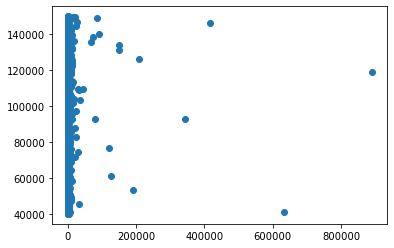

In [51]:
plt.scatter(ntaxa300_params_df["local_obs_time(gen)"],
           ntaxa300_params_df["J"])

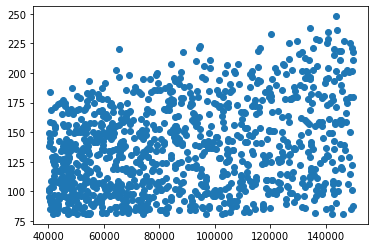

In [47]:
#plt.hist(ntaxa300_params_df["local_S"])
#plt.hist(ntaxa300_params_df["colrate"] * ntaxa300_params_df["J"])
plt.scatter(ntaxa300_params_df["J"],
        ntaxa300_params_df["local_S"])

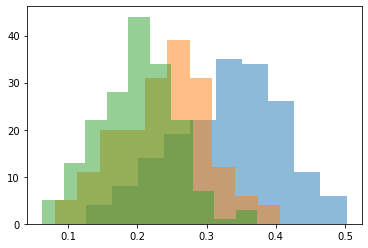

In [32]:
div = ntaxa300_params_df["local_S"]
for d in ["pi_h1", "pi_h2", "pi_h3"]:
    plt.hist(ntaxa300_params_df[d]/div, alpha=0.5)
#plt.hist(ntaxa300_params_df["local_S"])

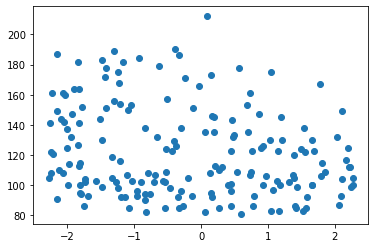

In [36]:
#plt.hist(ntaxa300_params_df["ecological_strength"])
plt.scatter(np.log(ntaxa300_params_df["ecological_strength"]),
        ntaxa300_params_df["local_S"])

In [17]:
data = iBioGen.Core("sim-ntaxa300")
data.set_param("assembly_model", "neutral")
data.set_param("ntaxa", 30)
data.set_param("ClaDS_sigma", "0.1-0.4")
data.set_param("ClaDS_alpha", "0.6-0.9")
#dat.set_param("ecological_strength", "1")
data.set_param("rm_duplicates", True)
data.set_param("colrate", "0.001-0.05")
data.set_param("J", "10000")
data.set_param("local_stop_time", "1000")
data.set_param("local_stop_criterion", "time")
tre, results = data._simulate(verbose=True)

ntips 30
time 9.57984037296019
Birth events 31
Extinctions (per birth) 2 (0.06451612903225806)


In [24]:
# Init the local community
l = iBioGen.LocalCommunity.LocalCommunity(params=data.paramsdict,
                     tre=tre,
                     verbose=True)
l._step_wf(100)
l._check_stop()
print(l._lambda)
l._finalize()
l.community

0
> /home/isaac/iBioGen/iBioGen/LocalCommunity.py(224)_finalize()
    222                 Ne = self._upper_Ne
    223                 import pdb; pdb.set_trace()
--> 224             ts = msprime.simulate(sample_size=self.paramsdict["sample_size"],
    225                                  Ne=Ne,
    226                                  length=self.paramsdict["sequence_length"],

ipdb> abund
5890
ipdb> self.community
       coltime  local_abund  migrants     trait   tau   pi  is_founder
m5-2       0.0         5890    1406.0 -2.426658  99.0  0.0         1.0
m16-1      0.0          285     560.0  4.794288  99.0  0.0         0.0
m22-1      0.0          624     741.0 -0.881899  99.0  0.0         0.0
m23-1      0.0           13     122.0 -3.909985  99.0  0.0         0.0
m19-2      0.0           38      83.0 -6.994062  99.0  0.0         0.0
m29-2      0.0          172     113.0 -1.994376  99.0  0.0         0.0
m8-2       0.0          371     376.0  0.890591  99.0  0.0         0.0
m25-1      0.

,coltime,local_abund,migrants,trait,tau,pi,is_founder
m5-2,0.0,5890,1406.0,-2.426658,99.0,0.152333,1.0
m16-1,0.0,285,560.0,4.794288,99.0,0.029467,0.0
m22-1,0.0,624,741.0,-0.881899,99.0,0.021786,0.0
m23-1,0.0,13,122.0,-3.909985,99.0,0.002000,0.0
m19-2,0.0,38,83.0,-6.994062,99.0,0.002000,0.0
m29-2,0.0,172,113.0,-1.994376,99.0,0.009500,0.0
m8-2,0.0,371,376.0,0.890591,99.0,0.023429,0.0
m25-1,0.0,437,413.0,-8.527918,99.0,0.027467,0.0
m31-2,0.0,224,260.0,-9.790655,99.0,0.006000,0.0
m24-1,0.0,179,166.0,-4.737429,99.0,0.007333,0.0


In [219]:
lambdas = []
while l._lambda < 1:
    l._step_wf(100)
    l._check_stop()
    lambdas.append(l._lambda)
    print(l._lambda),

0.19069999999999998
0.18489999999999995
0.17669999999999997
0.2126
0.19330000000000003
0.16690000000000005
0.24370000000000003
0.2388
0.23160000000000003
0.2097
0.1886
0.22719999999999996
0.2469
0.20709999999999995
0.22519999999999996
0.25870000000000004
0.24419999999999997
0.23950000000000005
0.2289
0.24039999999999995
0.26259999999999994
0.18969999999999998
0.23450000000000004
0.26359999999999995
0.30069999999999997
0.20579999999999998
0.2569
0.24870000000000003
0.21020000000000005
0.26870000000000005
0.23970000000000002
0.2542
0.24380000000000002
0.2693
0.24539999999999995
0.23070000000000002
0.272
0.23340000000000005
0.24339999999999995
0.23360000000000003
0.252
0.23350000000000004
0.2811
0.24129999999999996
0.23670000000000002
0.2146
0.24380000000000002
0.26280000000000003
0.267
0.242
0.24260000000000004
0.24970000000000003
0.279
0.2599
0.27290000000000003
0.2724
0.28159999999999996
0.25539999999999996
0.2509
0.2652
0.24329999999999996
0.24950000000000006
0.26570000000000005
0.261

KeyboardInterrupt: 

0.03386666666666666
0.03444444444444444


(array([ 9., 29., 18., 16., 14.,  5.,  4.,  3.,  1.,  1.]),
 array([0.00761905, 0.01900714, 0.03039524, 0.04178333, 0.05317143,
        0.06455952, 0.07594762, 0.08733571, 0.09872381, 0.1101119 ,
        0.1215    ]),
 <BarContainer object of 10 artists>)

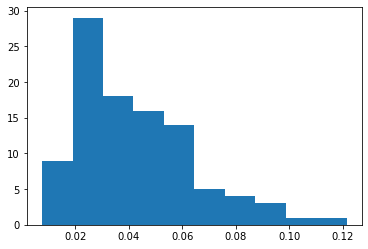

In [153]:
import msprime
max_Ne = 1000000
ts = msprime.simulate(sample_size=10, Ne=max_Ne,
                      length=500, mutation_rate=1e-8)
print(iBioGen.LocalCommunity._nucleotide_diversity(ts, False)/500)
print(iBioGen.LocalCommunity._nucleotide_diversity(ts, True)/500)

pis = []
for i in range(100):
    ts = msprime.simulate(sample_size=10, Ne=max_Ne,
                      length=500, mutation_rate=1e-8)
    pis.append(iBioGen.LocalCommunity._nucleotide_diversity(ts, True)/500)
plt.hist(pis)

In [122]:
0.02/(2*1e-8)

1000000.0